


# Fixed Income and Credit
# Master in Computational Finance (MCF)

# 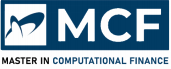

## Final Exam

**Professor**: N. Vasiljevic

## Bond Returns Predictability


In this exercise, we will study the expectations hypothesis. In particular, we will consider the famous Fama–Bliss model and try to answer some questions regarding the bond returns predictability. Use the data set provided in in the Excel sheet Fama Bliss.

**Remark**: Please note that in this exercise we adopt the following notation: 
- Subscripts represent the point in time (measured in years).
- Superscripts (parenthesized) denote the bond maturity/tenor (also measured in years). 

Read carefully through other notations and conventions introduced below.

Importing libraries:

In [ ]:
from typing import Dict

from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import sympy as sp
from sklearn.linear_model import LinearRegression

#### (a) Using the available zero-coupon bond prices $P_t^n$ (n = 1, 2, . . . , 5), construct continuously compounded yields $y^n_t$. Produce a table in which you report the following statistics:
- The average yield $E[y_t^{(n)}]$
- The yield volatility $σ[y_t^{(n)}]$
- The average term spread $E[y_t^{(n)} - y_t^{(1)}]$
- The average excess return $E[r_{t+1}^{(n)} - y_t^{(1)}]$, where $r_{t+1}^{(n)} = ln(P_{t+1}^{(n)}/P_t^{(n)})$
- The excess return bolatility $σ[[r_{t+1}^{(n)} - y_t^{(1)}]$
- The implied Sharpe ratio

Is the average risk premium for long-term bonds relatively high or low? Why would
you care to hold long-term bonds in your portfolio? Justify your answer.

In [ ]:
# Uploading dataset: MCF21_FIC_Final_Exam_Group_5.xlsx
uploaded = files.upload()

Saving MCF21_FIC_Final_Exam_Group_5.xlsx to MCF21_FIC_Final_Exam_Group_5.xlsx


In [ ]:
# Importing data set
data = pd.read_excel(
    "MCF21_FIC_Final_Exam_Group_5.xlsx",
    sheet_name="Fama_Bliss",
    index_col="Date",
    parse_dates=True)
    
data

,1Y,2Y,3Y,4Y,5Y
Date,,,,,
1964-01-31,96.29,92.50,88.85,85.40,81.92
1964-02-28,96.14,92.34,88.62,85.16,81.76
1964-03-31,96.17,92.17,88.36,84.73,81.59
1964-04-30,96.29,92.36,88.59,84.93,81.55
1964-05-28,96.24,92.43,88.76,85.10,81.94
...,...,...,...,...,...
2020-08-31,99.86,99.73,99.54,99.15,98.63
2020-09-30,99.87,99.75,99.51,99.16,98.59
2020-10-30,99.87,99.69,99.40,98.81,98.03


In [ ]:
# Data set statistical properties
data.describe()

,1Y,2Y,3Y,4Y,5Y
count,684.000000,684.000000,684.000000,684.000000,684.000000
mean,95.159898,90.283655,85.440556,80.690161,76.189751
std,3.164124,5.897328,8.149784,9.992364,11.464444
min,85.380000,73.140000,62.680000,53.080000,47.210000
25%,93.330000,86.645000,80.307500,74.235000,68.577500
50%,94.920000,89.850000,84.705000,79.860000,75.340000
75%,97.830000,95.132500,92.025000,88.592500,84.715000
max,99.900000,99.780000,99.630000,99.300000,98.910000


##### Calculating yields $y_t^{(n)}$:

In [ ]:
data.head()

,1Y,2Y,3Y,4Y,5Y
Date,,,,,
1964-01-31,96.29,92.50,88.85,85.40,81.92
1964-02-28,96.14,92.34,88.62,85.16,81.76
1964-03-31,96.17,92.17,88.36,84.73,81.59
1964-04-30,96.29,92.36,88.59,84.93,81.55
1964-05-28,96.24,92.43,88.76,85.10,81.94


In [ ]:
def ytm_zcb_continuous(price: float, fv: float, maturity:float) -> float:
  """Calculates YTM for ZCB for continuous compounding"""
  r = sp.Symbol('r', real=True)
  ytm = sp.solvers.solve(fv * sp.exp(-r*maturity) - price, r)[0]
  return ytm

In [ ]:
# NOTE: It takes 5-10 min to run (for each date and each bond estimating YTM).

# Maturities of the bonds
maturities = range(1, 6)

# ZBCs' yields
yields = pd.DataFrame(columns=data.columns)

# Calculating yields (1y-5y yield curve) for each time period
for t in data.index:
  print(f"Calculating yield curve for date: {t}")
  yield_curve = []
  for bond_price, maturity in zip(data.loc[t,], maturities):
    yield_curve.append(ytm_zcb_continuous(price=bond_price, fv=100, maturity=maturity))
  yields.loc[t] = yield_curve

Calculating yield curve for date: 1964-01-31 00:00:00
Calculating yield curve for date: 1964-02-28 00:00:00
Calculating yield curve for date: 1964-03-31 00:00:00
Calculating yield curve for date: 1964-04-30 00:00:00
Calculating yield curve for date: 1964-05-28 00:00:00
Calculating yield curve for date: 1964-06-30 00:00:00
Calculating yield curve for date: 1964-07-31 00:00:00
Calculating yield curve for date: 1964-08-31 00:00:00
Calculating yield curve for date: 1964-09-30 00:00:00
Calculating yield curve for date: 1964-10-30 00:00:00
Calculating yield curve for date: 1964-11-30 00:00:00
Calculating yield curve for date: 1964-12-31 00:00:00
Calculating yield curve for date: 1965-01-29 00:00:00
Calculating yield curve for date: 1965-02-26 00:00:00
Calculating yield curve for date: 1965-03-31 00:00:00
Calculating yield curve for date: 1965-04-30 00:00:00
Calculating yield curve for date: 1965-05-28 00:00:00
Calculating yield curve for date: 1965-06-30 00:00:00
Calculating yield curve for 

In [ ]:
# Yields for last two years
yields.astype(float).tail(24)

,1Y,2Y,3Y,4Y,5Y
2019-01-31,0.025318,0.024385,0.024190,0.024238,0.024275
2019-02-28,0.025215,0.024963,0.024836,0.024983,0.025090
2019-03-29,0.023883,0.022499,0.021975,0.022153,0.022209
2019-04-30,0.023678,0.022551,0.022296,0.022454,0.022723
2019-05-31,0.021939,0.019215,0.018751,0.018923,0.019016
2019-06-28,0.019591,0.017503,0.017133,0.017364,0.017635
2019-07-31,0.020407,0.018695,0.018152,0.018250,0.018270
2019-08-30,0.017960,0.015075,0.014268,0.014063,0.013913
2019-09-30,0.017859,0.016313,0.015557,0.015522,0.015463
2019-10-31,0.015114,0.015384,0.015104,0.015176,0.015247


In [ ]:
yields.astype(float).describe()

,1Y,2Y,3Y,4Y,5Y
count,684.000000,684.000000,684.000000,684.000000,684.000000
mean,0.050169,0.052191,0.053999,0.055610,0.056734
std,0.033506,0.033100,0.032380,0.031709,0.031007
min,0.001001,0.001101,0.001236,0.001756,0.002192
25%,0.021939,0.024950,0.027703,0.030281,0.033176
50%,0.052136,0.053514,0.055332,0.056224,0.056632
75%,0.069029,0.071675,0.073102,0.074484,0.075441
max,0.158058,0.156397,0.155709,0.158342,0.150113


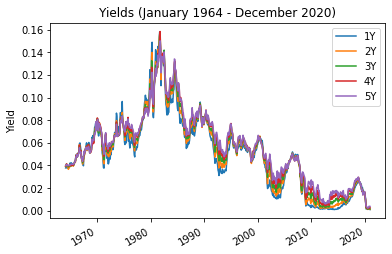

In [ ]:
# Yiels changing over time
yields.astype(float).plot(ylabel='Yield', title='Yields (January 1964 - December 2020)')

In [ ]:
# 3D plot of spot rates over past 60 years

# Plotly 3D plot
fig = go.Figure(data=[go.Surface(z=yields.astype(float))])
fig.update_layout(title='Yield curve (January 1964 - December 2020)',
                  autosize=False,
                  width=500,
                  height=500,
                  margin=dict(l=65, r=50, b=65, t=90),
                  )
# Axis labels
fig.update_scenes(xaxis = dict( title_text='Maturity'),
                  yaxis = dict( title_text='Months'),
                  zaxis = dict( title_text='Yield'),
                  )
fig.show()

In [ ]:
yields_calc = yields.astype(float)
yields_calc.describe()

,1Y,2Y,3Y,4Y,5Y
count,684.000000,684.000000,684.000000,684.000000,684.000000
mean,0.050169,0.052191,0.053999,0.055610,0.056734
std,0.033506,0.033100,0.032380,0.031709,0.031007
min,0.001001,0.001101,0.001236,0.001756,0.002192
25%,0.021939,0.024950,0.027703,0.030281,0.033176
50%,0.052136,0.053514,0.055332,0.056224,0.056632
75%,0.069029,0.071675,0.073102,0.074484,0.075441
max,0.158058,0.156397,0.155709,0.158342,0.150113


##### Calculating term spread $y_t^{(n)} - y_t^{(1)}$:


In [ ]:
# Calculating term spread
term_spread = pd.DataFrame()
term_spread["1Y"] = yields_calc["1Y"] - yields_calc["1Y"]
term_spread["2Y"] = yields_calc["2Y"] - yields_calc["1Y"]
term_spread["3Y"] = yields_calc["3Y"] - yields_calc["1Y"]
term_spread["4Y"] = yields_calc["4Y"] - yields_calc["1Y"]
term_spread["5Y"] = yields_calc["5Y"] - yields_calc["1Y"]
term_spread.head()

,1Y,2Y,3Y,4Y,5Y
1964-01-31,0.0,0.001175,0.001601,0.001650,0.002080
1964-02-28,0.0,0.000482,0.000906,0.000795,0.000912
1964-03-31,0.0,0.001715,0.002198,0.002372,0.001640
1964-04-30,0.0,0.001932,0.002578,0.003030,0.002985
1964-05-28,0.0,0.001034,0.001420,0.002011,0.001511


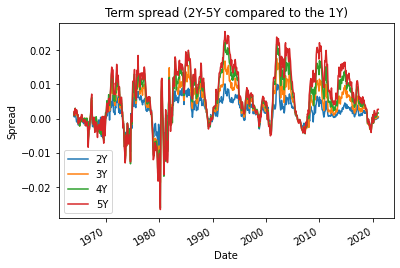

In [ ]:
term_spread[["2Y", "3Y", "4Y", "5Y"]].plot(
    ylabel='Spread',
    xlabel='Date',
    title='Term spread (2Y-5Y compared to the 1Y)'
    )

##### Calculating excess return $r_{t+1}^{(n)} - y_t^{(1)}$, where return on a bond after 1 year is $r_{t+1}^{(n)} = ln(P_{t+1}^{(n-1)}/P_t^{(n)})$

In [ ]:
# Bonds' log returns for 1y time period
bond_log_returns = pd.DataFrame()
bond_log_returns["2Y"] = np.log(data["1Y"] / data.shift(12)["2Y"])
bond_log_returns["3Y"] = np.log(data["2Y"] / data.shift(12)["3Y"])
bond_log_returns["4Y"] = np.log(data["3Y"] / data.shift(12)["4Y"])
bond_log_returns["5Y"] = np.log(data["4Y"] / data.shift(12)["5Y"])
bond_log_returns.tail(12)

,2Y,3Y,4Y,5Y
Date,,,,
2020-01-31,0.034468,0.046227,0.058211,0.069557
2020-02-28,0.039875,0.056039,0.072662,0.088163
2020-03-31,0.043396,0.060914,0.079572,0.097249
2020-04-30,0.043501,0.062780,0.082186,0.100734
2020-05-29,0.036427,0.052847,0.069374,0.084727
2020-06-30,0.033304,0.048294,0.064143,0.079740
2020-07-31,0.036090,0.052254,0.069294,0.084323
2020-08-31,0.028749,0.040099,0.051642,0.061028
2020-09-30,0.031326,0.044169,0.057176,0.068878


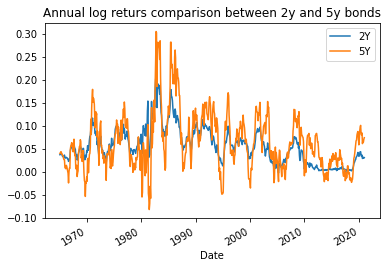

In [ ]:
# 2Y and 5Y bonds log returns comparison
bond_log_returns[["2Y", "5Y"]].plot(title="Annual log returs comparison between 2y and 5y bonds")

In [ ]:
# Calculating annual bonds' excess returns
excess_return = pd.DataFrame()
# excess_return["1Y"] = bond_log_returns["1Y"] - yields_calc.shift(12)["1Y"]
excess_return["2Y"] = bond_log_returns["2Y"] - yields_calc.shift(12)["1Y"]
excess_return["3Y"] = bond_log_returns["3Y"] - yields_calc.shift(12)["1Y"]
excess_return["4Y"] = bond_log_returns["4Y"] - yields_calc.shift(12)["1Y"]
excess_return["5Y"] = bond_log_returns["5Y"] - yields_calc.shift(12)["1Y"]

excess_return.tail()

,2Y,3Y,4Y,5Y
Date,,,,
2020-08-31,0.010789,0.022139,0.033682,0.043068
2020-09-30,0.013467,0.026311,0.039318,0.051019
2020-10-30,0.014354,0.027093,0.039574,0.049148
2020-11-30,0.015396,0.029420,0.043417,0.054455
2020-12-31,0.014870,0.029914,0.046026,0.058300


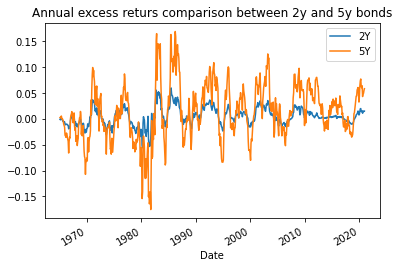

In [ ]:
# 2Y and 5Y excess return comparison
excess_return[["2Y", "5Y"]].plot(title="Annual excess returs comparison between 2y and 5y bonds")

In [ ]:
excess_return.describe()

,2Y,3Y,4Y,5Y
count,672.000000,672.000000,672.000000,672.000000
mean,0.004753,0.008843,0.012361,0.013773
std,0.016857,0.031031,0.043305,0.053628
min,-0.056034,-0.104327,-0.135508,-0.175551
25%,-0.006049,-0.011270,-0.014630,-0.019242
50%,0.003709,0.006820,0.010944,0.012105
75%,0.014713,0.028519,0.041164,0.049670
max,0.059695,0.102645,0.143860,0.168899


##### Results for expected values

In [ ]:
statistics = pd.DataFrame(
    columns=["1Y", "2Y", "3Y", "4Y", "5Y"],
    index=[
           "Average yield",
           "Yield volatility",
           "Average term spread",
           "Average excess return",
           "Excess return volatility",
           "Implied Sharp ratio"
           ]
    )

In [ ]:
statistics.loc["Average yield"] = yields_calc.describe().loc["mean"]
statistics.loc["Yield volatility"] = yields_calc.describe().loc["std"]
statistics.loc["Average term spread"] = term_spread.describe().loc["mean"]
statistics.loc["Average excess return"] = excess_return.describe().loc["mean"]
statistics.loc["Excess return volatility"] = excess_return.describe().loc["std"]
statistics.loc["Implied Sharp ratio"] = statistics.loc["Average excess return"]/bond_log_returns.describe().loc["std"]
statistics.drop(labels=["1Y"], axis=1)

,2Y,3Y,4Y,5Y
Average yield,0.0521905,0.0539992,0.0556104,0.0567342
Yield volatility,0.0330999,0.03238,0.031709,0.0310071
Average term spread,0.00202138,0.00383012,0.0054413,0.00656507
Average excess return,0.00475283,0.00884275,0.0123613,0.0137727
Excess return volatility,0.0168569,0.0310313,0.0433053,0.0536277
Implied Sharp ratio,0.121975,0.190784,0.227197,0.222182


We're working with historical montly bond prices, from January of 1964 to December of 2020. Bonds are with the following maturities:
- 1 year
- 2 years
- 3 years
- 4 years
- 5 years

From the calculated yields, we can see that the changes in the past 60 years are quite dramatic, which of course has a major effect on the markets and investment strategies. At some point they were up to 16%! And after any major market chash we can notice that interest rates have decreased. And in recent years they are in one of the lowest periods ever.

As yield curve changes and moves over time, taking various shapes, average values for yields, term spread and excess returns can be misleading. Especially because we're looking at 60-year time period, where there were significant and ground breaking changes on the market. There were periods with really high interest rates and periods of nearly 0% interest rates and on some markets like in Europe and Japan, interest rates are now in the sub-zero territory. 

We calculated term spread of bonds' yields compared to the 1y bond yields. We can see that the spread gets widther and widther as the maturity is longer.

Average (expected) yields are higher for longer-term bonds compared to the short-term bonds. Contrary to that is the bond yield volatility. We can see that the volatility is higher on the shor-end. That is because the Central Banks influence and set short-term interest rates. But only looking at yield volatility could be misleading. In order to better understand risks (interest rate risk) associated with the bonds, we have to look at bonds sensitivies: duration and convexity.

Excess returns (1y return on the bond price relative to the 1y ZCB yield) was also calculated. Again, just looking at the average value could be misleading. But if we concentrate on that value, we'll see that the expected excess return for all the bonds is positive, meaning that on average we would slightly profit from buying and selling some longer-term bonds than from holding 1y ZCB and wait untill maturity. That is the risk premium that we get for holding longer term bonds.

We can also notice that the volatiliy of the excess returns is greater than the volatility of the yields, meaning that there might be better opportunity to make profits from trading (assuming you know what you're doing :) ).

From the plot of excess returns we can see that the spread between 2y and 5y bonds' excess returns is quite wide. We can see that excess returns are increasing as the maturity is longer, meaning that the expected excess return is higher for longer maturity bonds, thus meaning that the risk premium is higher for them. Also by looking at Sharpe ratio, longer-term bonds look more appealing from return-risk perspective compared to the short-term bonds. All of that makes sense, since we want to be rewarded for holding longer-term bonds, beacause of the higher level of uncertainty what might happen across various risk dimensions during the bond term.

#### (b) In the lecture notes, we provided results based on the following (one-step-ahead) predictive regression analysis for n-year zero-coupon bonds (n = 2, 3, 4, 5) for the period 1964M1–2020M12: $rx_{t+1}^{(n)} = a + b(f_t^{(n)} - y_t^{(1)}) + ε_{t+1}$:
- $rx_{t+1}^{(n)}$ is the excess bond return over the period [t,t+1]
- $f_t^{(n)}$ is the forward rate for the period [t+b-1, t+n]



##### (b.1.) Run the above regression for the following periods: 1964M1–1973M12,1974M1–1983M12, 1984M1–1993M12, 1994M1–2003M12, 2004M1–2013M12, and 2014M1–2020M12. In your output tables, report any statistics you consider important for a regression analysis. How does the predictability change over time? How does the predictability change over maturities? Discuss your results.

In [ ]:
# Calculating forward rates

# Years ahad for forward rates
fr_t = [2, 3, 4, 5]

# Forward rates df, to pupulate
forward_rate = pd.DataFrame()

# Calculating forward rates
print("Calculating forward rates:")
for t in fr_t:
  print(f"\tFor each time t: F^({t}) = ln(P^({t-1}) / P^({t}))")
  forward_rate[f"{t}Y"] = np.log(data[f"{t-1}Y"] / data[f"{t}Y"])

forward_rate.tail()

Calculating forward rates:
	For each time t: F^(2) = ln(P^(1) / P^(2))
	For each time t: F^(3) = ln(P^(2) / P^(3))
	For each time t: F^(4) = ln(P^(3) / P^(4))
	For each time t: F^(5) = ln(P^(4) / P^(5))


,2Y,3Y,4Y,5Y
Date,,,,
2020-08-31,0.001303,0.001907,0.003926,0.005258
2020-09-30,0.001202,0.002409,0.003523,0.005765
2020-10-30,0.001804,0.002913,0.005953,0.007925
2020-11-30,0.001804,0.002511,0.005748,0.007410
2020-12-31,0.001503,0.002208,0.005844,0.008118


In [ ]:
def fama_bliss_regression(n: int, start:str, end:str) -> Dict[str, float]:
  # Excess return (for t+1)
  y = excess_return.loc[start:end,][f"{n}Y"]
  y = y.to_list()

  # Forward-spot spread (for t)
  x = forward_rate.shift(12).loc[start:end,][f"{n}Y"] - yields_calc.shift(12).loc[start:end,]["1Y"]
  x = np.array(x.to_list()).reshape((-1, 1))

  # Fitting Linar regression
  model = LinearRegression()
  model.fit(x, y)
  r_sq = model.score(x, y)

  return {
      "Intercept": model.intercept_,
      "Slope": model.coef_[0],
      "R-squared": r_sq,
  }

In [ ]:
# Fama-Bliss regression: 1964M1–1973M1

start = "1968-01-31"
end = "1973-12-31"

regression_results_1968_1973 = pd.DataFrame(
    index=["2Y", "3Y", "4Y", "5Y"],
    columns=["Intercept", "Slope", "R-squared"]
    )
for n in range(2,6):
  regression_results_1968_1973.loc[f"{n}Y"] = fama_bliss_regression(n, start, end)

print(f"Fama-Bliss regression: {start} ----> {end}")
regression_results_1968_1973

Fama-Bliss regression: 1968-01-31 ----> 1973-12-31


,Intercept,Slope,R-squared
2Y,-0.0033019,0.704032,0.0630238
3Y,-0.00617364,0.926778,0.067665
4Y,-0.0107018,1.38508,0.0942767
5Y,-0.00790147,0.30017,0.00389614


In [ ]:
# Fama-Bliss regression: 1974M1–1983M12

start = "1974-01-31"
end = "1983-12-31"

regression_results_1974_1983 = pd.DataFrame(
    index=["2Y", "3Y", "4Y", "5Y"],
    columns=["Intercept", "Slope", "R-squared"]
    )
for n in range(2,6):
  regression_results_1974_1983.loc[f"{n}Y"] = fama_bliss_regression(n, start, end)

print(f"Fama-Bliss regression: {start} ----> {end}")
regression_results_1974_1983

Fama-Bliss regression: 1974-01-31 ----> 1983-12-31


,Intercept,Slope,R-squared
2Y,-0.00185389,0.704057,0.0737076
3Y,-0.006427,1.16225,0.127194
4Y,-0.0110636,1.19745,0.0843075
5Y,-0.0149333,0.624877,0.0189758


In [ ]:
# Fama-Bliss regression: 1984M1–1993M12

start = "1984-01-31"
end = "1993-12-31"

regression_results_1984_1993 = pd.DataFrame(
    index=["2Y", "3Y", "4Y", "5Y"],
    columns=["Intercept", "Slope", "R-squared"]
    )
for n in range(2,6):
  regression_results_1984_1993.loc[f"{n}Y"] = fama_bliss_regression(n, start, end)

print(f"Fama-Bliss regression: {start} ----> {end}")
regression_results_1984_1993

Fama-Bliss regression: 1984-01-31 ----> 1993-12-31


,Intercept,Slope,R-squared
2Y,0.0050097,1.101,0.148589
3Y,0.00829756,1.27597,0.109041
4Y,0.0032593,1.80696,0.192126
5Y,0.0203491,1.16065,0.0469503


In [ ]:
# Fama-Bliss regression: 1994M1–2003M12

start = "1994-01-31"
end = "2003-12-31"

regression_results_1994_2003 = pd.DataFrame(
    index=["2Y", "3Y", "4Y", "5Y"],
    columns=["Intercept", "Slope", "R-squared"]
    )
for n in range(2,6):
  regression_results_1994_2003.loc[f"{n}Y"] = fama_bliss_regression(n, start, end)

print(f"Fama-Bliss regression: {start} ----> {end}")
regression_results_1994_2003

Fama-Bliss regression: 1994-01-31 ----> 2003-12-31


,Intercept,Slope,R-squared
2Y,0.00684053,0.245853,0.0106153
3Y,0.00958842,0.519542,0.0245191
4Y,0.0145434,0.382188,0.0105322
5Y,0.0148325,0.513389,0.0160033


In [ ]:
# Fama-Bliss regression: 2004M1–2013M12

start = "2004-01-31"
end = "2013-12-31"

regression_results_2004_2013 = pd.DataFrame(
    index=["2Y", "3Y", "4Y", "5Y"],
    columns=["Intercept", "Slope", "R-squared"]
    )
for n in range(2,6):
  regression_results_2004_2013.loc[f"{n}Y"] = fama_bliss_regression(n, start, end)

print(f"Fama-Bliss regression: {start} ----> {end}")
regression_results_2004_2013

Fama-Bliss regression: 2004-01-31 ----> 2013-12-31


,Intercept,Slope,R-squared
2Y,0.00655322,-0.465188,0.0590888
3Y,0.0129824,-0.120173,0.00300291
4Y,0.0144352,0.346236,0.0216084
5Y,0.0159041,0.539925,0.0501598


In [ ]:
# Fama-Bliss regression: 2014M1–2020M12

start = "2014-01-31"
end = "2020-12-31"

regression_results_2014_2020 = pd.DataFrame(
    index=["2Y", "3Y", "4Y", "5Y"],
    columns=["Intercept", "Slope", "R-squared"]
    )
for n in range(2,6):
  regression_results_2014_2020.loc[f"{n}Y"] = fama_bliss_regression(n, start, end)

print(f"Fama-Bliss regression: {start} ----> {end}")
regression_results_2014_2020

Fama-Bliss regression: 2014-01-31 ----> 2020-12-31


,Intercept,Slope,R-squared
2Y,0.00588276,-0.793766,0.129326
3Y,0.0119867,-0.541118,0.053471
4Y,0.0212304,-0.599641,0.0576361
5Y,0.0266274,-0.699712,0.0560871


In [ ]:
# Fama-Bliss regression: 1965M1–2012M12
# The whole dataset (same as on the lecture, to compare the results)

start = "1965-01-31"
end = "2012-12-31"

regression_results_1965_2012 = pd.DataFrame(
    index=["2Y", "3Y", "4Y", "5Y"],
    columns=["Intercept", "Slope", "R-squared"]
    )
for n in range(2,6):
  regression_results_1965_2012.loc[f"{n}Y"] = fama_bliss_regression(n, start, end)

print(f"Fama-Bliss regression: {start} ----> {end}")
regression_results_1965_2012

Fama-Bliss regression: 1965-01-31 ----> 2012-12-31


,Intercept,Slope,R-squared
2Y,0.00148421,0.834511,0.116387
3Y,0.000405247,1.14534,0.13594
4Y,-0.00173331,1.39357,0.158318
5Y,0.00139473,1.14023,0.0884821


First we calculated forward rates for each time period: $f_t^{(n)} = p_t^{(n-1)} - p_t^{(n)} = ln(P_t^{(n-1)}/P_t^{(n)})$.

Forward rate $f_t^{(n)}$ is the interest rate for one period of time (1 year) that starts in the future: $[t+n-1, t+n]$. Here it's denoted as the forward rate for the last year before bond matures. It is equivalent to the 1y ZCB that is issued in the furure in time t+n-1.

From the expectation hypothesis we get that forward-spot spread ($f_t^{(n)} - y_t^{(1)}$) predicts one of the following things:
- Future excess returns
- Future yields (yield differential)



In order to test that statement, we ran two regressions for each of the maturities ( excluding 1y maturity):
- Fama-Bliss regression of the excess returns ($r_{t+1}^{(n)} - y_t^{(1)}$) on the forward-spot-spread ($f_t^{(n)} - y_t^{(1)}$).
- Complementary Fama-Bliss regression of the yield differential ($y_{t+n-1}^{(n)} - y_t^{(1)}$) on the forward-spot-spread ($f_t^{(n)} - y_t^{(1)}$).

We ran those two regressions on the following time periods, subsets:
- 1964M1 – 1973M12
- 1974M1 – 1983M12
- 1984M1 – 1993M12
- 1994M1 – 2003M12 
- 2004M1 – 2013M12
- 2014M1 – 2020M12

For all of the time periods we got that the coefficient *b* (slope) is positive and different from one except for following periods, where it's negative:
- 2014M1 – 2020M12: 2Y, 3Y, 4Y and 5Y bonds
- 2004M1 – 2013M12: 2Y and 3Y bonds

That imples that in most cases, the excess return varies over time, in a predictible manner, except for the mentioned periods where the slope coefficient is negative (2004M1-2013M12 for 2y and 3Y bonds and in the last decade accross all bonds).

From theory of expectation hypothesis we know that the slope coefficient should be 0 (excess return or risk premium). Across maturities, results that we got varies over subperiods we look. In most cases they are quite different than 0, meaning that there is some indication of returns predictability indeed. For example:
- 1964M1 – 1973M12 and 1974M1 – 1983M12, we got that for 3Y and 4Y bonds slope coefficient was nearly equal to 1, compared to the slope coefficients for 2y and 5y bonds, where it was closer to 0.5. That means for those first two bonds there is a better return predictability.
- 1994M1 – 2003M12 is another interesting time period where slope coefficients across all maturities are lower than 0.5 indicating lower bond return predictability.
- 2014M1 – 2020M12, we can observe that the slope coefifients for all maturities are in the interval between -0.8 to -0.5, indicating really low bond return predictability.

##### (b.2) For the same set of subsamples, as well as for the full sample, run the following complementary regression: $y_{t+n-1}^{(n)} = α + β(f_t^{(n)} - y_t^{(n)}) + η_{t+n-1}$.

Create the same output tables as for the excess return regressions. Compare the results of the excess return and complementary regressions. Discuss your findings.

In [ ]:
def fama_bliss_complementary_regression(n: int, start:str, end:str) -> Dict[str, float]:
  # Forward spot spread (for t+n-1)
  y = yields_calc.loc[start:end,][f"{n}Y"] - yields_calc.shift((n-1)*12).loc[start:end,]["1Y"] 
  y = y.to_list()

  # Forward-spot spread (for t)
  x = forward_rate.shift((n-1)*12).loc[start:end,][f"{n}Y"] - yields_calc.shift((n-1)*12).loc[start:end,]["1Y"]
  x = np.array(x.to_list()).reshape((-1, 1))

  model = LinearRegression()
  model.fit(x, y)
  r_sq = model.score(x, y)

  return {
      "Intercept": model.intercept_,
      "Slope": model.coef_[0],
      "R-squared": r_sq,
  }

In [ ]:
# Fama-Bliss complementary regression: 1964M1–1973M1
# We're starting from 1968 (because of lost data for calculation)

start = "1968-01-31"
end = "1973-12-31"

regression_results_c_1968_1973 = pd.DataFrame(
    index=["2Y", "3Y", "4Y", "5Y"],
    columns=["Intercept", "Slope", "R-squared"]
    )
for n in range(2,6):
  regression_results_c_1968_1973.loc[f"{n}Y"] = fama_bliss_complementary_regression(n, start, end)

print(f"Fama-Bliss complementary regression: {start} ----> {end}")
regression_results_c_1968_1973

Fama-Bliss complementary regression: 1968-01-31 ----> 1973-12-31


,Intercept,Slope,R-squared
2Y,0.00339775,0.42882,0.032695
3Y,0.00246907,0.825575,0.142925
4Y,0.00629522,0.655867,0.0713698
5Y,0.0120327,0.55252,0.068605


In [ ]:
# Fama-Bliss complementary regression: 1974M1–1983M12

start = "1974-01-31"
end = "1983-12-31"

regression_results_c_1974_1983 = pd.DataFrame(
    index=["2Y", "3Y", "4Y", "5Y"],
    columns=["Intercept", "Slope", "R-squared"]
    )
for n in range(2,6):
  regression_results_c_1974_1983.loc[f"{n}Y"] = fama_bliss_complementary_regression(n, start, end)

print(f"Fama-Bliss complementary regression: {start} ----> {end}")
regression_results_c_1974_1983

Fama-Bliss complementary regression: 1974-01-31 ----> 1983-12-31


,Intercept,Slope,R-squared
2Y,0.00318871,0.467456,0.0444353
3Y,0.0104055,0.6422,0.10875
4Y,0.0164802,1.08738,0.331994
5Y,0.0183845,1.30208,0.427264


In [ ]:
# Fama-Bliss complementary regression: 1984M1–1993M12

start = "1984-01-31"
end = "1993-12-31"

regression_results_c_1984_1993 = pd.DataFrame(
    index=["2Y", "3Y", "4Y", "5Y"],
    columns=["Intercept", "Slope", "R-squared"]
    )
for n in range(2,6):
  regression_results_c_1984_1993.loc[f"{n}Y"] = fama_bliss_complementary_regression(n, start, end)

print(f"Fama-Bliss complementary regression: {start} ----> {end}")
regression_results_c_1984_1993

Fama-Bliss complementary regression: 1984-01-31 ----> 1993-12-31


,Intercept,Slope,R-squared
2Y,-0.00239281,0.108483,0.00179476
3Y,-0.0148661,0.731026,0.0758804
4Y,-0.0187828,0.59575,0.135133
5Y,-0.0222448,0.847081,0.290202


In [ ]:
# Fama-Bliss complementary regression: 1994M1–2003M12

start = "1994-01-31"
end = "2003-12-31"

regression_results_c_1994_2003 = pd.DataFrame(
    index=["2Y", "3Y", "4Y", "5Y"],
    columns=["Intercept", "Slope", "R-squared"]
    )
for n in range(2,6):
  regression_results_c_1994_2003.loc[f"{n}Y"] = fama_bliss_complementary_regression(n, start, end)

print(f"Fama-Bliss complementary regression: {start} ----> {end}")
regression_results_c_1994_2003

Fama-Bliss complementary regression: 1994-01-31 ----> 2003-12-31


,Intercept,Slope,R-squared
2Y,-0.003972,0.763459,0.0925554
3Y,-0.0119056,1.22266,0.384736
4Y,-0.0167882,1.24754,0.625127
5Y,-0.0144468,1.04094,0.571295


In [ ]:
# Fama-Bliss complementary regression: 2004M1–2013M12

start = "2004-01-31"
end = "2013-12-31"

regression_results_c_2004_2013 = pd.DataFrame(
    index=["2Y", "3Y", "4Y", "5Y"],
    columns=["Intercept", "Slope", "R-squared"]
    )
for n in range(2,6):
  regression_results_c_2004_2013.loc[f"{n}Y"] = fama_bliss_complementary_regression(n, start, end)

print(f"Fama-Bliss complementary  regression: {start} ----> {end}")
regression_results_c_2004_2013

Fama-Bliss complementary  regression: 2004-01-31 ----> 2013-12-31


,Intercept,Slope,R-squared
2Y,-0.00566094,1.65125,0.489822
3Y,-0.0149562,1.45699,0.519593
4Y,-0.0233108,1.42431,0.665727
5Y,-0.0237297,1.23347,0.751323


In [ ]:
# Fama-Bliss complementary regression: 2014M1–2020M12

start = "2014-01-31"
end = "2020-12-31"

regression_results_c_2014_2020 = pd.DataFrame(
    index=["2Y", "3Y", "4Y", "5Y"],
    columns=["Intercept", "Slope", "R-squared"]
    )
for n in range(2,6):
  regression_results_c_2014_2020.loc[f"{n}Y"] = fama_bliss_complementary_regression(n, start, end)

print(f"Fama-Bliss complementary regression: {start} ----> {end}")
regression_results_c_2014_2020

Fama-Bliss complementary regression: 2014-01-31 ----> 2020-12-31


,Intercept,Slope,R-squared
2Y,-0.00519392,2.02195,0.462772
3Y,-0.00148636,0.866148,0.12856
4Y,0.00208704,0.548796,0.148778
5Y,0.0048296,0.390558,0.173744


In this section, we run the similar, complementary regression of bond yield differentials on forward-spot-spread. That regerssion was done multiple times, over the same time intervals as in the previous section.

From the expection hypothesis theory, we know that the slope coefficient for complementary Fama-Bliss regression (denoetd as $β$) should be equal to one.

But in real world, what we get from the data is a bit different. We can see that in all time periods, across all maturities that it's different that 1, especially for the following time periods, where slope values are closer to 0 than to 1:
- 1994M1 – 2003M12
- 1964M1 – 1973M1
Opposite example is period between 2004M1 to 2013M12, where slope coefficients were in the range 0.48-0.75, indicating better future yield (yield differential) predictability.

When it comes to predictability on different bond maturities within the same time period, it seems that expecation hypothesis works bettet as maturity increases, the accuracy becomes better. If we look at the slope coefficients, they are rising and getting closer to one as mutirity is longer.

One example where that is not the case is period from 2014M1 to 2020M12, where the story is completely opposite - slope coefficients are decreasing from 0.46 to 0.17, indicating lower yield predictability for the longer-term bonds. If we recall the results from the previous section, there was also not so great predictability in the same time period (all slope coeffiecients were negative). That is time period, the past decade where we went into the low interest territory.


The Fama-Bliss regression paper was published in 1987. Since than, many things have chaned in the world and across markets. Some models that previously explained some things on the markets, over time, their performance degraded. Here, we used quite simple form for testing expectation hypothesis. Maybe we could get better results with adding some more terms which would take other things into account, e.g. something that wasn't at the time paper was written. That is what some recent itterations of Fama-Bliss regressons are been published in the recent years.


#### (c) If you run the regressions correctly you should see that the slope coefficients add up to one for n = 2, but not for n > 2. Provide a theoretical derivation of this result for n = 2, and discuss why it does not hold for n > 2.

In [ ]:
print('Summing slope terms from two regression (1968-1973)')
for t in regression_results_1968_1973.index:
  print(f'{t}: {regression_results_1968_1973.loc[t]["Slope"] + regression_results_c_1968_1973.loc[t]["Slope"]}')

Summing slope terms from two regression (1968-1973)
2Y: 1.1328519031181006
3Y: 1.7523529445492043
4Y: 2.040943410522648
5Y: 0.8526901552367384


In [ ]:
print('Summing slope terms from two regression (1974-1983)')
for t in regression_results_1974_1983.index:
  print(f'{t}: {regression_results_1974_1983.loc[t]["Slope"] + regression_results_c_1974_1983.loc[t]["Slope"]}')

Summing slope terms from two regression (1974-1983)
2Y: 1.1715127048214633
3Y: 1.80444652933354
4Y: 2.284829295317302
5Y: 1.9269611847755737


In [ ]:
print('Summing slope terms from two regression (1984-1993)')
for t in regression_results_1984_1993.index:
  print(f'{t}: {regression_results_1984_1993.loc[t]["Slope"] + regression_results_c_1984_1993.loc[t]["Slope"]}')

Summing slope terms from two regression (1984-1993)
2Y: 1.2094817889934373
3Y: 2.0069998500710433
4Y: 2.402706174081093
5Y: 2.0077330606923605


In [ ]:
print('Summing slope terms from two regression (1994-2003)')
for t in regression_results_1994_2003.index:
  print(f'{t}: {regression_results_1994_2003.loc[t]["Slope"] + regression_results_c_1994_2003.loc[t]["Slope"]}')

Summing slope terms from two regression (1994-2003)
2Y: 1.0093129006588335
3Y: 1.7422026902927126
4Y: 1.6297291475345665
5Y: 1.554325891093232


In [ ]:
print('Summing slope terms from two regression (2004-2013)')
for t in regression_results_2004_2013.index:
  print(f'{t}: {regression_results_2004_2013.loc[t]["Slope"] + regression_results_c_2004_2013.loc[t]["Slope"]}')

Summing slope terms from two regression (2004-2013)
2Y: 1.1860657612706378
3Y: 1.3368213655542796
4Y: 1.7705469998937478
5Y: 1.7733999937595963


In [ ]:
print('Summing slope terms from two regression (2014-2020)')
for t in regression_results_2014_2020.index:
  print(f'{t}: {regression_results_2014_2020.loc[t]["Slope"] + regression_results_c_2014_2020.loc[t]["Slope"]}')

Summing slope terms from two regression (2014-2020)
2Y: 1.2281819448778282
3Y: 0.32502946988900083
4Y: -0.05084512619614234
5Y: -0.3091533354484367


In [ ]:
riskr premium for longer-maturity bonds?

For testing of expectation hypothesis, our starting point is looking at the *forward-spot-spread*. Lets go step by step and derivate the expression for regression, on an example of 2 year bond ($n=2$):

From the definitions of forward rates and yields, we got the following identity:

$f_t^{(2)} - y_t^{(1)} = p_t^{(1)} - p_t^{(2)} + p_t^{(1)}$

Now adding $+p_{t+1}^{(1)}$ and $-p_{t+1}^{(1)}$ on the right hand side:

$f_t^{(2)} - y_t^{(1)} = (p_{t+1}^{(1)} - p_t^{(2)} + p_t^{(1)}) + (-p_{t+1}^{(1)} +p_t^{(1)}$)

$f_t^{(2)} - y_t^{(1)} = (r_{t+1}^{(2)} - y_t^{(1)}) + (y_{t+1}^{(1)} - y_t^{(1)})$

On the right side we have two terms:
1. Excess return on the 2y bond
2. Yield differential (different between the same point on the yield curve but in the different times)

A positive forward spread must imply a positive excess return on two-year bonds or an increase in one-year interest rate.

What we know from expectation theory is that forward-spot-spread must predict either *future excess returns* or *future yields (differential)*

We can build regression to check that claim:

$r_{t+1}^{(2)} - y_t^{(1)} = a + b(f_t^{(2)} - y_t^{(1)}) + ErrorTerm_{t+1}$

$y_{t+1}^{(1)} - y_t^{(1)} = α + β(f_t^{(2)} - y_t^{(1)}) + ErrorTerm_{t+1}$

For this two regression in order to be equivalent with the derived identity from above, ignoring error terms, following this have to be equal:
- $ a + α = 0 $
- $ b + β = 1 $

And the expectation hypetesis sates:
- $ b = 0 $
- $ β = 1 $

In the section above we summed up the slope coefficients from two regressions, for each maturity and for all time periods.

We can see that for two yaer bond the sum is equal or nearly equal to one, while for the other maturities that is not the case.

What is immediately clear from the results is that expectaion hypothesis doesn't work as expected. We got that the sum of slope coefficients is equal to one (or closely equal to one) only for 2y bonds. There is a higher risk of holding longer term bonds, if you buy those bonds on the market you expect to be rewarded with a higher risk premium compared to the lower maturity bonds.